In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.ensemble import IsolationForest,BaggingClassifier, GradientBoostingClassifier, VotingClassifier

import matplotlib.pyplot as plt
%matplotlib inline
  
from sklearn.model_selection import train_test_split, GridSearchCV,learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, RocCurveDisplay
  

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 


In [3]:

# Load the dataset
file_path = './wireless_churn.csv'
data = pd.read_csv(file_path)


In [5]:

# Generate the pandas profiling report
profile = ProfileReport(data, title="Exploratory Data Analysis Report", explorative=True)

# Save the report to an HTML file
profile.to_file("EDA_Report.html")

print("EDA report has been generated and saved as 'EDA_Report.html'.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

EDA report has been generated and saved as 'EDA_Report.html'.


Class Split
Churn
0    2850
1     483
Name: count, dtype: int64


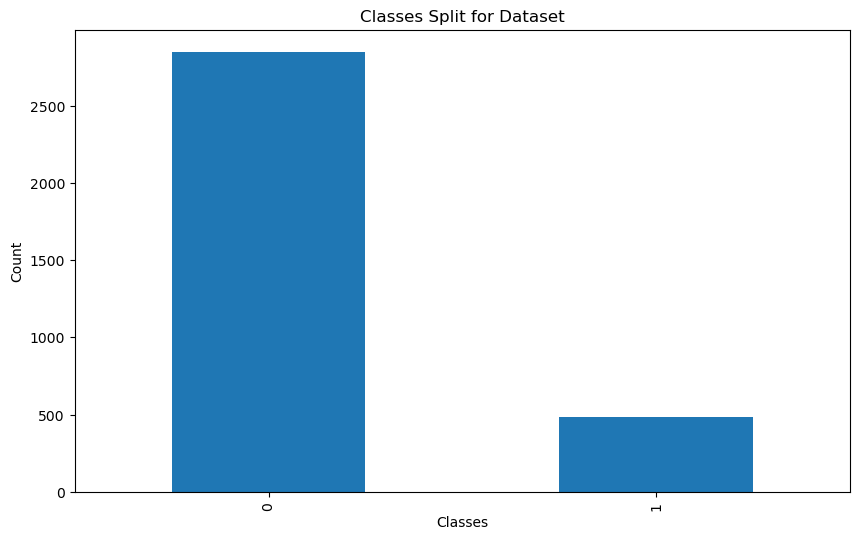

In [95]:
#Class Balance
print('Class Split')
print(data['Churn'].value_counts())
data['Churn'].value_counts().plot.bar(figsize=(10,6),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')


# Add plt.show() to display the plot
plt.show()

In [11]:


# Handle non-numeric columns by encoding or dropping them (if necessary)
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model and predict outliers
numeric_data['outlier'] = isolation_forest.fit_predict(numeric_data)

# Outliers are marked as -1, inliers as 1
cleaned_data = numeric_data[numeric_data['outlier'] == 1]
cleaned_data = cleaned_data.drop(columns=['outlier'])

# Combine the cleaned numeric data back with non-numeric data (if applicable)
non_numeric_data = data.select_dtypes(exclude=['float64', 'int64'])
result_data = pd.concat([cleaned_data, non_numeric_data], axis=1)

# Save the cleaned dataset to a new CSV file
result_data.to_csv('cleaned_dataset.csv', index=False)

print("Outliers removed and cleaned dataset saved as 'cleaned_dataset.csv'.")


Outliers removed and cleaned dataset saved as 'cleaned_dataset.csv'.


In [19]:
result_data.head(10)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128.0,1.0,1.0,2.70,1.0,265.1,110.0,89.0,9.87,10.0,0.0
1,107.0,1.0,1.0,3.70,1.0,161.6,123.0,82.0,9.78,13.7,0.0
2,137.0,1.0,0.0,0.00,0.0,243.4,114.0,52.0,6.06,12.2,0.0
5,118.0,0.0,0.0,0.00,0.0,223.4,98.0,57.0,11.03,6.3,0.0
8,117.0,1.0,0.0,0.19,1.0,184.5,97.0,63.9,17.58,8.7,0.0
11,74.0,1.0,0.0,0.34,0.0,187.7,127.0,49.4,8.17,9.1,0.0
12,168.0,1.0,0.0,0.00,1.0,128.8,96.0,31.0,5.25,11.2,0.0
13,95.0,1.0,0.0,0.44,3.0,156.6,88.0,52.4,12.38,12.3,0.0
14,62.0,1.0,0.0,0.00,4.0,120.7,70.0,47.0,15.36,13.1,0.0
17,93.0,1.0,0.0,0.00,3.0,190.7,114.0,51.0,10.91,8.1,0.0


In [45]:
result_data.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
count,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000,2629.000000
mean,100.446177,0.978699,0.217954,0.635515,1.474325,176.709661,100.187143,53.905173,10.009079,10.161316,0.057436
std,38.252544,0.144413,0.412934,1.111429,1.141029,47.814101,18.911634,14.344145,2.382894,2.612614,0.232719
min,1.000000,0.000000,0.000000,0.000000,0.000000,7.800000,30.000000,15.700000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,144.200000,88.000000,44.000000,8.370000,8.500000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,1.000000,177.900000,100.000000,52.000000,10.030000,10.200000,0.000000
75%,126.000000,1.000000,0.000000,0.360000,2.000000,210.700000,113.000000,61.000000,11.670000,11.900000,0.000000
max,243.000000,1.000000,1.000000,4.050000,7.000000,312.000000,160.000000,97.600000,17.710000,18.900000,1.000000


Class Split
Churn
0.0    2478
1.0     151
Name: count, dtype: int64


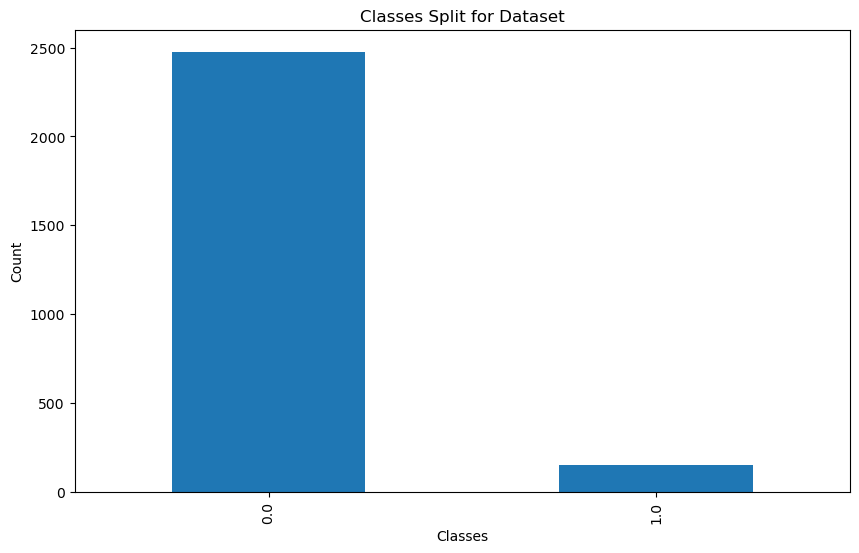

In [93]:
#Class Balance
print('Class Split')
print(result_data['Churn'].value_counts())
result_data['Churn'].value_counts().plot.bar(figsize=(10,6),title='Classes Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')


# Add plt.show() to display the plot
plt.show()

In [53]:
# Option 1: Drop rows with missing target values
result_data = result_data.dropna(subset=['Churn'])

# Option 2: Impute missing target values (e.g., replace with mode)
result_data['Churn'] = result_data['Churn'].fillna(result_data['Churn'].mode()[0])


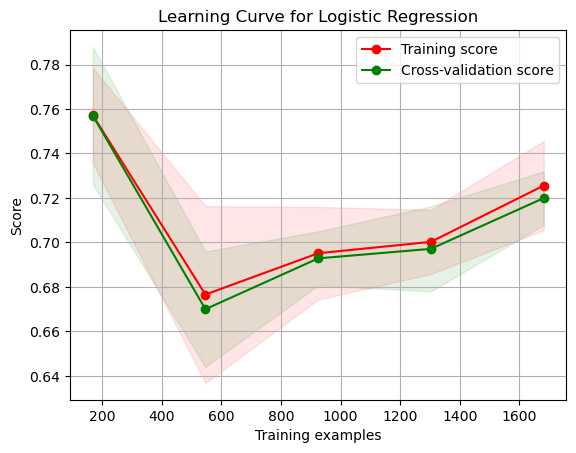

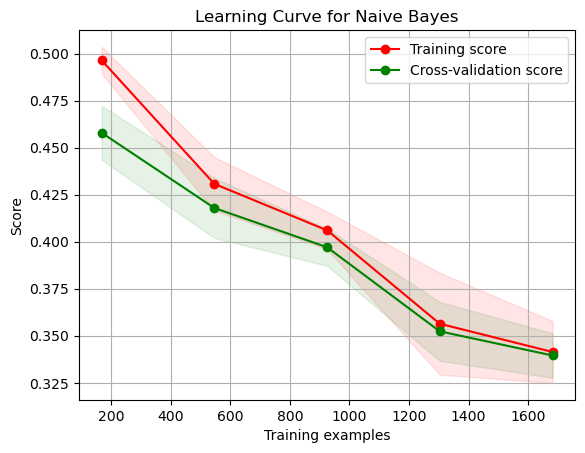

In [61]:


# Preprocess the result_data: handle non-numeric columns
label_encoders = {}
for column in result_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    result_data[column] = le.fit_transform(result_data[column])
    label_encoders[column] = le

# Split the result_data into features and target
X = result_data.drop(columns=['Churn'])  # Replace 'target_column' with the actual target column name
y = result_data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, scoring):
    plt.figure()
    plt.title(title)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring=scoring, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    
# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
plot_learning_curve(log_reg, "Learning Curve for Logistic Regression", X_train, y_train, scoring='recall_weighted')

# Naive Bayes
naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, "Learning Curve for Naive Bayes", X_train, y_train, scoring='recall_weighted')




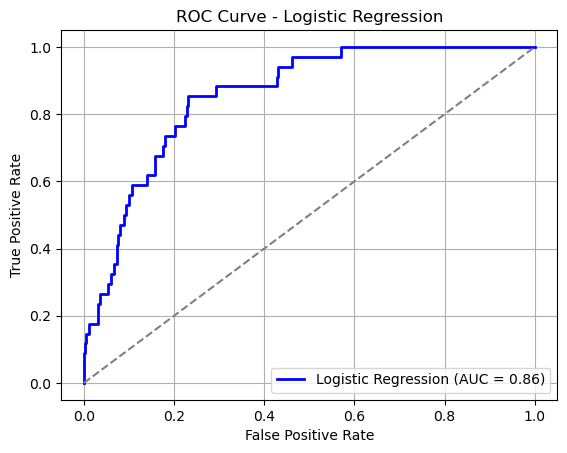

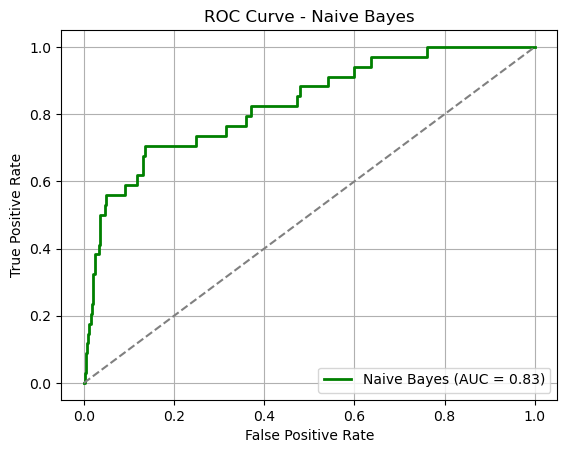

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      0.69      0.81       492
         1.0       0.16      0.88      0.28        34

    accuracy                           0.70       526
   macro avg       0.58      0.78      0.54       526
weighted avg       0.93      0.70      0.78       526

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

         0.0       0.99      0.30      0.46       492
         1.0       0.09      0.97      0.16        34

    accuracy                           0.35       526
   macro avg       0.54      0.64      0.31       526
weighted avg       0.93      0.35      0.44       526



In [65]:

 

# Logistic Regression with GridSearchCV for optimization
log_reg = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=100)
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}
grid_log_reg = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='recall_weighted', n_jobs=-1)
grid_log_reg.fit(X_train, y_train)

# Best Logistic Regression model
best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test)
log_reg_probs = best_log_reg.predict_proba(X_test)[:, 1]

# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_probs)
roc_auc_log = auc(fpr_log, tpr_log)
plt.figure()
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Naive Bayes with no hyperparameters to tune
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
nb_probs = naive_bayes.predict_proba(X_test)[:, 1]

# ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Classification Reports
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))


In [83]:
# Define Logistic Regression model
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Define Naive Bayes model
nb_clf = GaussianNB()

# Define Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Define Bagging model
bagging_clf = BaggingClassifier(estimator=log_reg, n_estimators=10, random_state=42)

# Create the first voting classifier with Logistic Regression and Gradient Boosting
voting_clf_1 = VotingClassifier(
    estimators=[('log_reg', log_reg), ('gb', gb_clf)],
    voting='soft'
)

# Create the second voting classifier with Naive Bayes and Bagging
voting_clf_2 = VotingClassifier(
    estimators=[('nb', nb_clf), ('bagging', bagging_clf)],
    voting='soft'
)

# Train and evaluate the first ensemble model
voting_clf_1.fit(X_train, y_train)
y_pred_1 = voting_clf_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f'Ensemble Voting Classifier 1 (Logistic Regression + Gradient Boosting) Accuracy: {accuracy_1:.2f}')

# Train and evaluate the second ensemble model
voting_clf_2.fit(X_train, y_train)
y_pred_2 = voting_clf_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f'Ensemble Voting Classifier 2 (Naive Bayes + Bagging) Accuracy: {accuracy_2:.2f}')


Ensemble Voting Classifier 1 (Logistic Regression + Gradient Boosting) Accuracy: 0.95
Ensemble Voting Classifier 2 (Naive Bayes + Bagging) Accuracy: 0.41


In [91]:
 
# Define Logistic Regression model
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Define Naive Bayes model
nb_clf = GaussianNB()

# Define Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Define Bagging model
bagging_clf = BaggingClassifier(estimator=Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
]), n_estimators=10, random_state=42)

# Create the first voting classifier with Logistic Regression and Gradient Boosting
voting_clf_1 = VotingClassifier(
    estimators=[('log_reg', log_reg), ('gb', gb_clf)],
    voting='soft'
)

# Create the second voting classifier with Naive Bayes and Bagging
voting_clf_2 = VotingClassifier(
    estimators=[('nb', nb_clf), ('bagging', bagging_clf)],
    voting='soft'
)

# Train and evaluate the first ensemble model
voting_clf_1.fit(X_train, y_train)
y_pred_1 = voting_clf_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f'Ensemble Voting Classifier 1 (LogReg + GB) Accuracy: {accuracy_1:.2f}')

# Train and evaluate the second ensemble model
voting_clf_2.fit(X_train, y_train)
y_pred_2 = voting_clf_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f'Ensemble Voting Classifier 2 (NB + Bagging) Accuracy: {accuracy_2:.2f}')

# Identify the best model for Mr. John Hughes
best_model = "Voting Classifier 1 (Logistic Regression + Gradient Boosting)" if accuracy_1 > accuracy_2 else "Voting Classifier 2 (Naive Bayes + Bagging)"
print(f'Recommended Model for Mr. John Hughes: {best_model}')

# Suggested next steps
print("\nNext Steps:")
print("1. Perform feature selection or engineering to improve model interpretability and reduce overfitting.")
print("2. Tune hyperparameters of the selected model using Grid Search or Randomized Search to enhance its performance.")


Ensemble Voting Classifier 1 (LogReg + GB) Accuracy: 0.95
Ensemble Voting Classifier 2 (NB + Bagging) Accuracy: 0.41
Recommended Model for Mr. John Hughes: Voting Classifier 1 (Logistic Regression + Gradient Boosting)

Next Steps:
1. Perform feature selection or engineering to improve model interpretability and reduce overfitting.
2. Tune hyperparameters of the selected model using Grid Search or Randomized Search to enhance its performance.
